# Analysis of COVID-19 county data from New York and California (Pilot analysis)
In this script, time series data from New York and California counties is analyzed descriptively.
Data is selected from the .csv files previously prepared in covid_raw_data_processing.ipynb script <br>
After this analysis, next steps are:
- Repeating the analysis on the entire county data set
- Use of QNPy for further analysis and prediction on New York and California Data

Import the data and relevant packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from MFDFA import MFDFA
from astropy.timeseries import LombScargle
from scipy.fftpack import fft

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# One county data:
county_cases_df = pd.read_csv(r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\data_by_county\pilot_cases_by_county\6001_cases.csv')

county_deaths_df = pd.read_csv(r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\data_by_county\pilot_deaths_by_county\6001_deaths.csv')

In [2]:
county_cases_df

,Date,Cases,Error
0,2020-11-01,24018,0.05
1,2020-11-02,24134,0.05
2,2020-11-03,24235,0.05
3,2020-11-04,24302,0.05
4,2020-11-05,24421,0.05
...,...,...,...
217,2021-06-06,90610,0.05
218,2021-06-07,90635,0.05
219,2021-06-08,90688,0.05
220,2021-06-09,90731,0.05


In [3]:
county_cases_df.dtypes

Date      object
Cases      int64
Error    float64
dtype: object

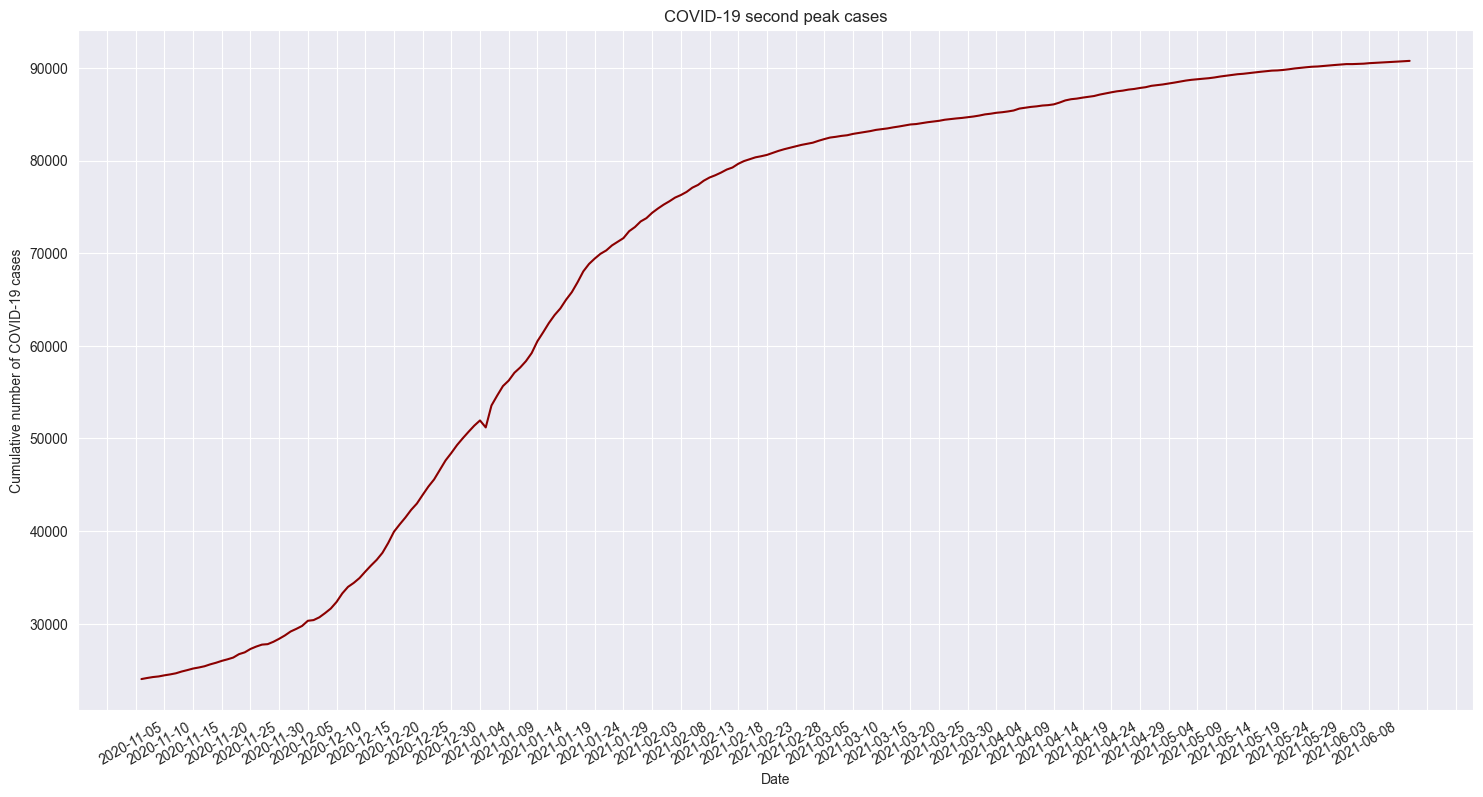

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(18,10))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(county_cases_df.Date,county_cases_df.Cases, color="darkred")
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Cumulative number of COVID-19 cases")
plt.title("COVID-19 second peak cases")
plt.show()

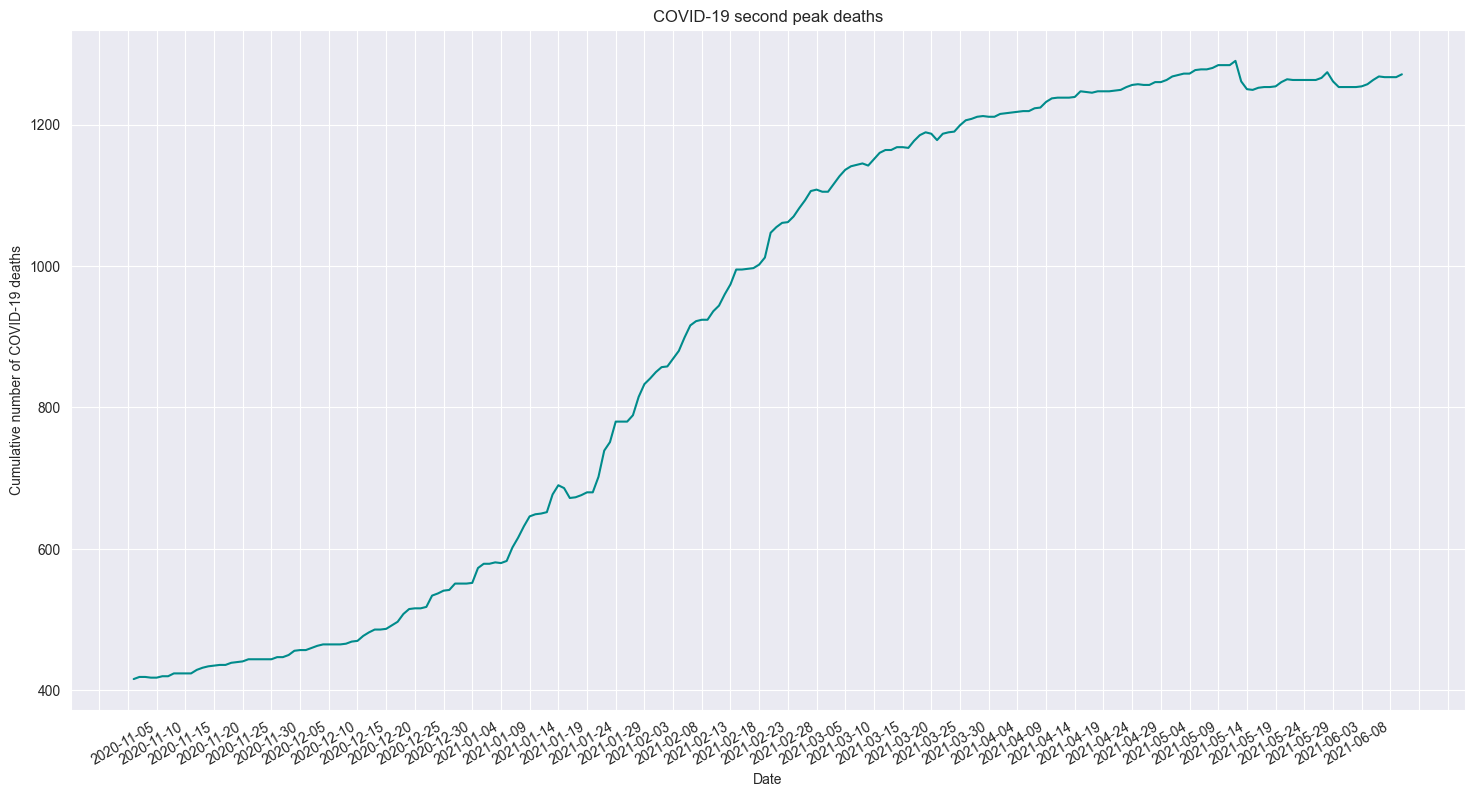

In [5]:
plt.figure(figsize=(18,10))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(county_deaths_df.Date,county_deaths_df.Deaths, color="darkcyan")
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Cumulative number of COVID-19 deaths")
plt.title("COVID-19 second peak deaths")
plt.show()

In [6]:
import astropy.units as u

county_cases_df.Date = pd.to_datetime(county_cases_df.Date)
county_cases_df.dtypes
t_cumulative_cases = county_cases_df.Date.astype('int64') * u.day
y_cumulative_cases = county_cases_df.Cases * u.mag
dy_cumulative_cases = county_cases_df.Cases * u.mag
frequency, power = LombScargle(t_cumulative_cases, y_cumulative_cases, dy_cumulative_cases).autopower()

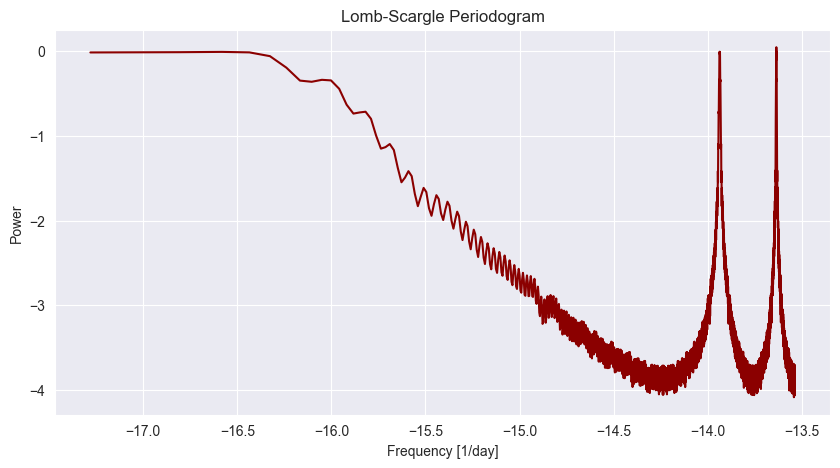

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(frequency), np.log10(power), color="darkred")
plt.title('Lomb-Scargle Periodogram')
plt.xlabel('Frequency [1/day]')
plt.ylabel('Power')
plt.grid(True)
plt.show()

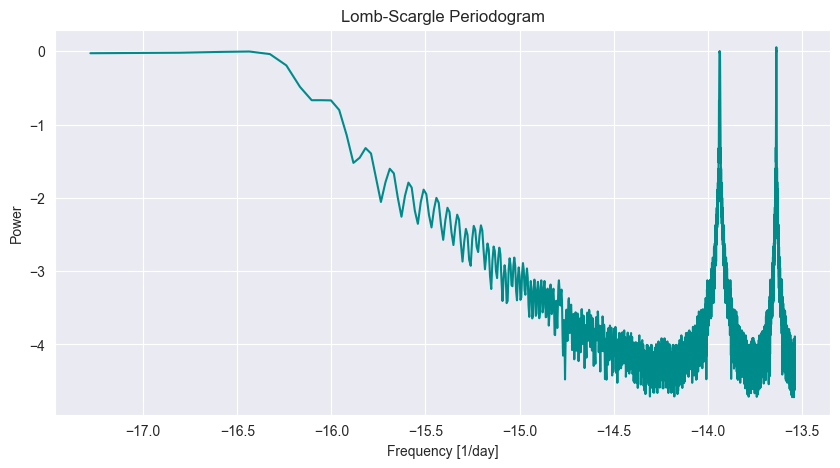

In [8]:
county_deaths_df.Date = pd.to_datetime(county_deaths_df.Date)
t_cumulative_deaths = county_deaths_df.Date.astype('int64') * u.day
y_cumulative_deaths = county_deaths_df.Deaths * u.mag
dy_cumulative_deaths = county_deaths_df.Deaths * u.mag
frequency, power = LombScargle(t_cumulative_deaths, y_cumulative_deaths, dy_cumulative_deaths).autopower()
plt.figure(figsize=(10, 5))
plt.plot(np.log10(frequency), np.log10(power), color="darkcyan")
plt.title('Lomb-Scargle Periodogram')
plt.xlabel('Frequency [1/day]')
plt.ylabel('Power')
plt.grid(True)
plt.show()

### Create daily deaths and cases data sets
- it would also be interesting to explore periodicity of daily deaths and cases data

In [9]:
county_deaths_df

,Date,Deaths,Error
0,2020-11-01,416,0.5
1,2020-11-02,419,0.5
2,2020-11-03,419,0.5
3,2020-11-04,418,0.5
4,2020-11-05,418,0.5
...,...,...,...
217,2021-06-06,1268,0.5
218,2021-06-07,1267,0.5
219,2021-06-08,1267,0.5
220,2021-06-09,1267,0.5


In [10]:
def cumulative_to_daily_deaths(df):
    import warnings
    from pandas.errors import SettingWithCopyWarning
    warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

    df_daily= df.copy()
    for i in range(1, df_daily.shape[0]):
        df_daily.Deaths[i] = df_daily.Deaths[i] - df.Deaths[i-1]
        if df_daily.Deaths[i] < 0:
            df_daily.Deaths[i] = 0
    df_daily.Deaths[0] = 0

    return df_daily

In [11]:
def cumulative_to_daily_cases(df):
    import warnings
    from pandas.errors import SettingWithCopyWarning
    warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

    df_daily= df.copy()
    for i in range(1, df_daily.shape[0]):
        df_daily.Cases[i] = df_daily.Cases[i] - df.Cases[i-1]
        if df_daily.Cases[i] < 0:
            df_daily.Cases[i] = 0
    df_daily.Cases[0] = 0

    return df_daily

In [12]:
daily_deaths = cumulative_to_daily_deaths(county_deaths_df)
daily_deaths

,Date,Deaths,Error
0,2020-11-01,0,0.5
1,2020-11-02,3,0.5
2,2020-11-03,0,0.5
3,2020-11-04,0,0.5
4,2020-11-05,0,0.5
...,...,...,...
217,2021-06-06,5,0.5
218,2021-06-07,0,0.5
219,2021-06-08,0,0.5
220,2021-06-09,0,0.5


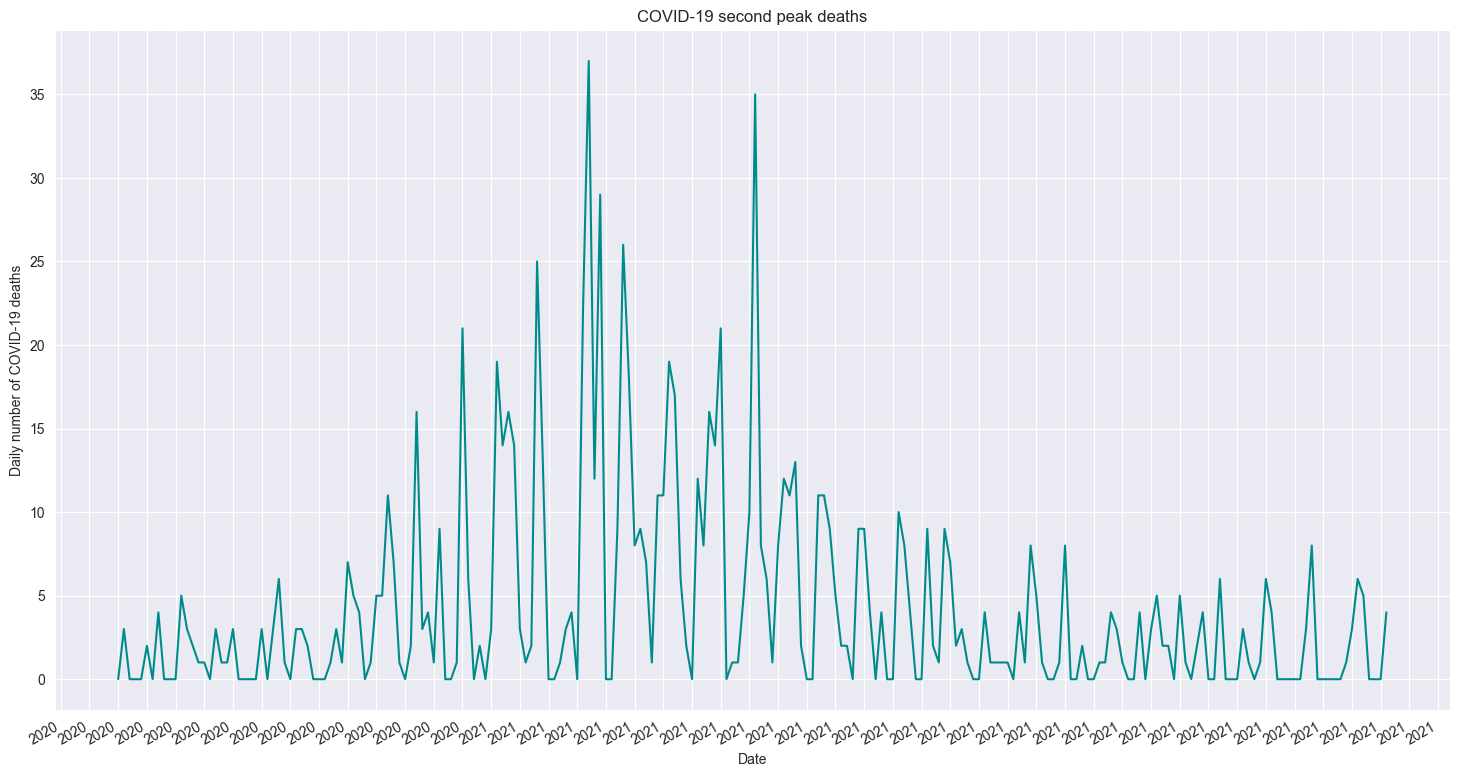

In [13]:
plt.figure(figsize=(18,10))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(daily_deaths.Date,daily_deaths.Deaths, color='darkcyan')
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Daily number of COVID-19 deaths")
plt.title("COVID-19 second peak deaths")
plt.show()

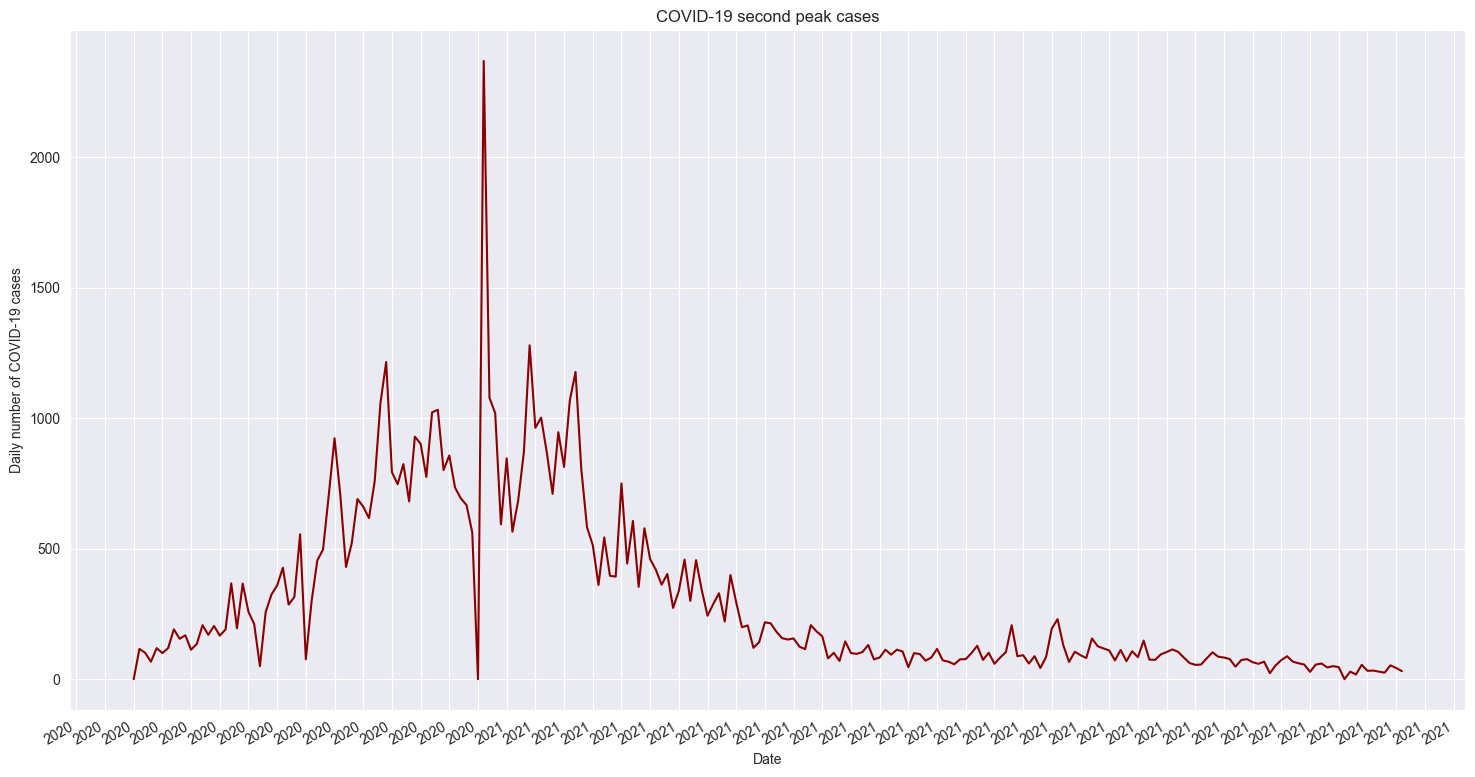

In [14]:
daily_cases = cumulative_to_daily_cases(county_cases_df)
plt.figure(figsize=(18,10))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.plot(daily_cases.Date,daily_cases.Cases, color='darkred')
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Daily number of COVID-19 cases")
plt.title("COVID-19 second peak cases")
plt.show()

C:\Users\marko\AppData\Local\Temp\ipykernel_32036\3890336440.py:7: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(frequency), np.log10(power), color="darkcyan")


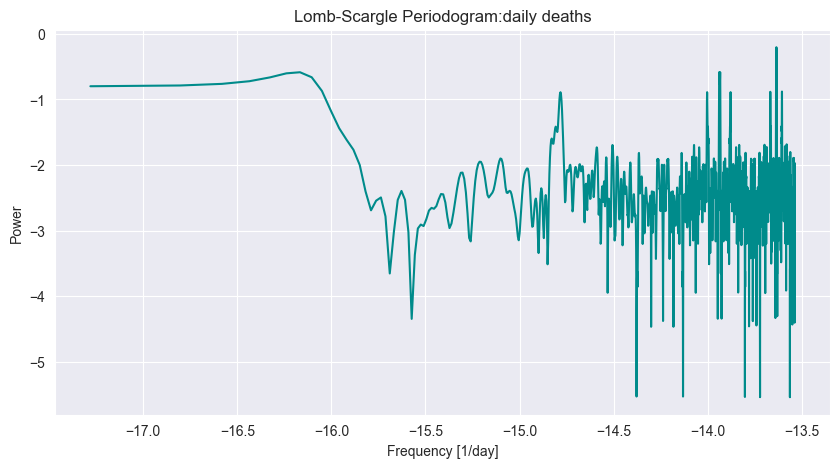

In [15]:
daily_deaths.Date = pd.to_datetime(daily_deaths.Date)
t_daily_deaths = daily_deaths.Date.astype('int64') * u.day
y_daily_deaths = daily_deaths.Deaths * u.mag
dy_daily_deaths = daily_deaths.Deaths * u.mag
frequency, power = LombScargle(t_daily_deaths, y_daily_deaths).autopower()
plt.figure(figsize=(10, 5))
plt.plot(np.log10(frequency), np.log10(power), color="darkcyan")
plt.title('Lomb-Scargle Periodogram:daily deaths')
plt.xlabel('Frequency [1/day]')
plt.ylabel('Power')
plt.grid(True)
plt.show()

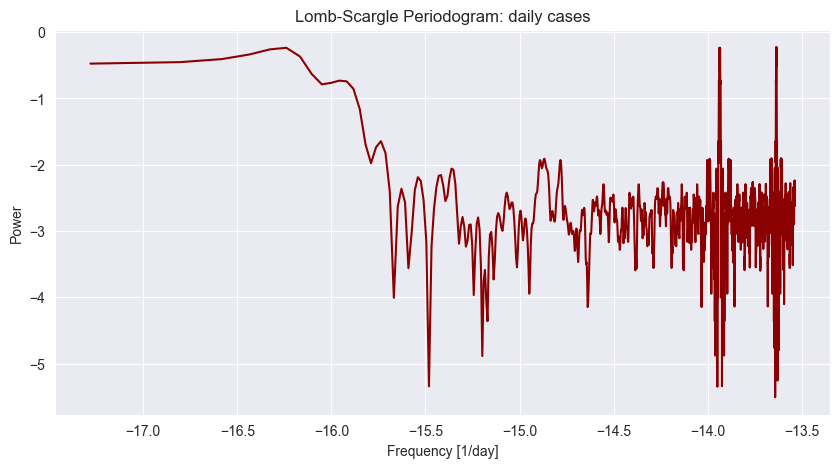

In [16]:
daily_cases.Date = pd.to_datetime(daily_cases.Date)
t_daily_cases = daily_cases.Date.astype('int64') * u.day
y_daily_cases = daily_cases.Cases * u.mag
frequency, power = LombScargle(t_daily_cases,y_daily_cases).autopower()
plt.figure(figsize=(10, 5))
plt.plot(np.log10(frequency), np.log10(power), color="darkred")
plt.title('Lomb-Scargle Periodogram: daily cases')
plt.xlabel('Frequency [1/day]')
plt.ylabel('Power')
plt.grid(True)
plt.show()

### Structure function analysis

Define structure function

In [17]:
def structure_function(t, y):
    n = len(t)
    delta_t = []
    structure_fun = []

    # Loop over all pairs of data points
    for i in range(n):
        for j in range(i+1, n):
            dt = abs(t[j] - t[i])
            dy = y[j] - y[i]

            delta_t.append(dt)
            structure_fun.append(dy**2)

    # Aggregate over unique delta_t values
    unique_dt = np.unique(delta_t)
    aggregated_sf = []

    for dt in unique_dt:
        indices = np.where(delta_t == dt)
        mean_sf_for_dt = np.sqrt(np.mean(np.array(structure_fun)[indices]))
        aggregated_sf.append(mean_sf_for_dt)

    return unique_dt, aggregated_sf

Apply the function to covid-19 cases data

Plot the results (For COVID-19 cases)

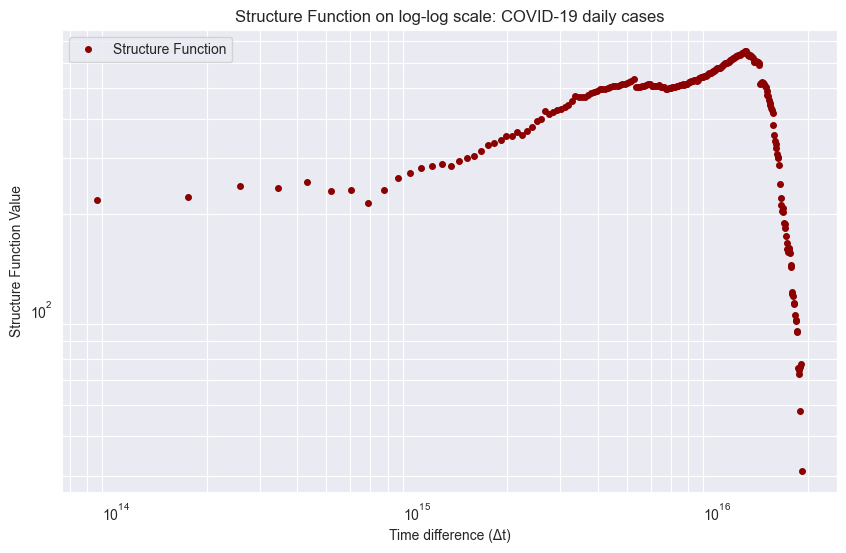

In [18]:
# Plot
delta_ts, SF_values = structure_function(t_daily_cases, y_daily_cases)

plt.figure(figsize=(10, 6))
plt.loglog(delta_ts, SF_values, 'o', label='Structure Function', color="darkred",  ms=4)
plt.xlabel('Time difference (Δt)')
plt.ylabel('Structure Function Value')
plt.title('Structure Function on log-log scale: COVID-19 daily cases')
plt.grid(which='both')
plt.legend()
plt.show()

Apply the function to covid-19 deaths data

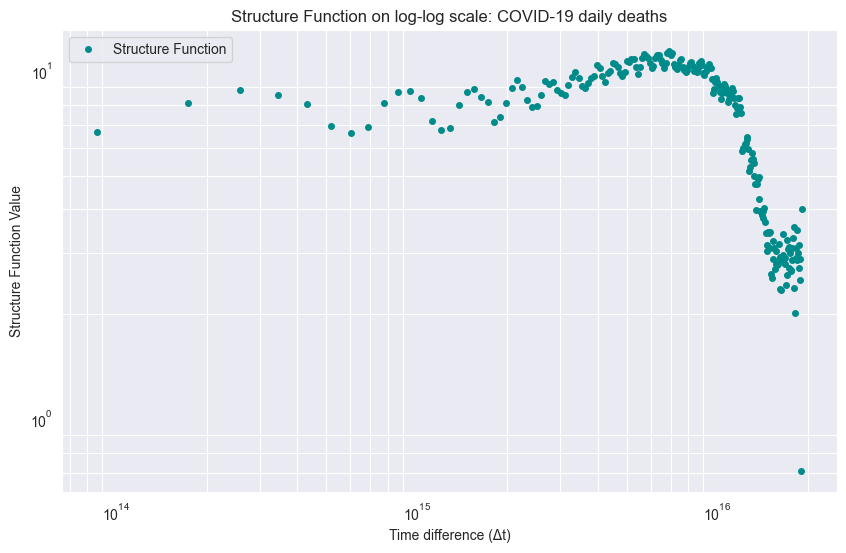

In [19]:
# Plot
delta_ts, SF_values = structure_function(t_daily_deaths, y_daily_deaths)
plt.figure(figsize=(10, 6))
plt.loglog(delta_ts, SF_values, 'o', label='Structure Function', color="darkcyan",  ms=4)
plt.xlabel('Time difference (Δt)')
plt.ylabel('Structure Function Value')
plt.title('Structure Function on log-log scale: COVID-19 daily deaths')
plt.grid(which='both')
plt.legend()
plt.show()

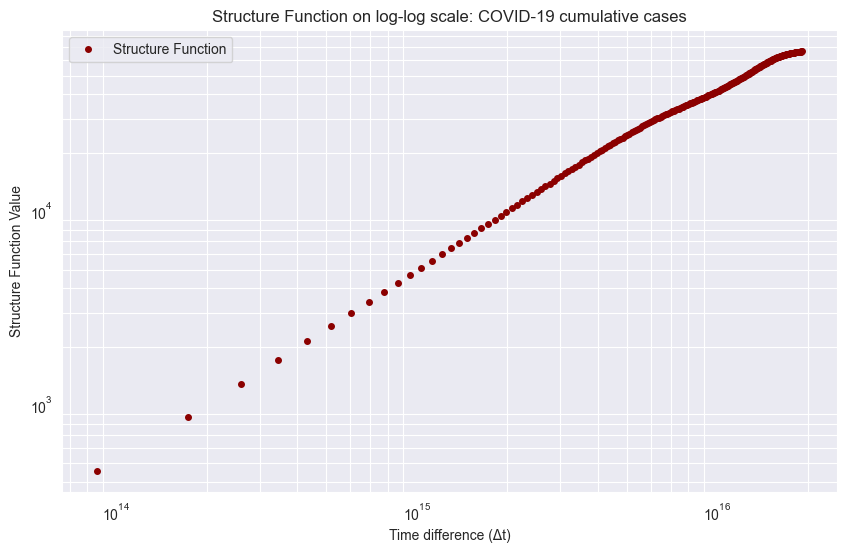

In [20]:
# Plot

delta_ts, SF_values = structure_function(t_cumulative_cases, y_cumulative_cases)

plt.figure(figsize=(10, 6))
plt.loglog(delta_ts, SF_values, 'o', label='Structure Function', color="darkred",  ms=4)
plt.xlabel('Time difference (Δt)')
plt.ylabel('Structure Function Value')
plt.title('Structure Function on log-log scale: COVID-19 cumulative cases')
plt.grid(which='both')
plt.legend()
plt.show()

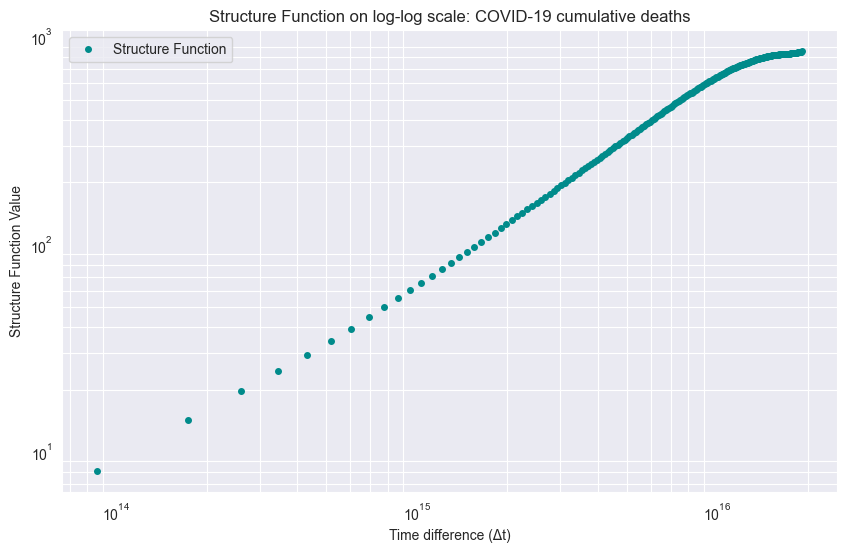

In [21]:
# Plot
delta_ts, SF_values = structure_function(t_cumulative_deaths, y_cumulative_deaths)

plt.figure(figsize=(10, 6))
plt.loglog(delta_ts, SF_values, 'o', label='Structure Function', color="darkcyan",  ms=4)
plt.xlabel('Time difference (Δt)')
plt.ylabel('Structure Function Value')
plt.title('Structure Function on log-log scale: COVID-19 cumulative deaths')
plt.grid(which='both')
plt.legend()
plt.show()

### Binned structure function

In [22]:
def structure_function_binned(t, y, n_bins=50):
    n = len(t)
    delta_t = []
    structure_fun = []

    # Loop over all pairs of data points
    for i in range(n):
        for j in range(i+1, n):
            dt = abs(t[j] - t[i])
            dy = y[j] - y[i]

            delta_t.append(dt)
            structure_fun.append(dy**2)

    # Logarithmic binning
    bins = np.logspace(np.log10(min(delta_t)), np.log10(max(delta_t)), n_bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    binned_sf = []

    for i in range(n_bins - 1):
        indices = (delta_t >= bins[i]) & (delta_t < bins[i+1])
        if np.sum(indices) > 0:
            mean_sf_for_bin = np.sqrt(np.mean(np.array(structure_fun)[indices]))
            binned_sf.append(mean_sf_for_bin)
        else:
            binned_sf.append(np.nan)  # No data in this bin

    return bin_centers, binned_sf

Apply the binned function do daily cases data:

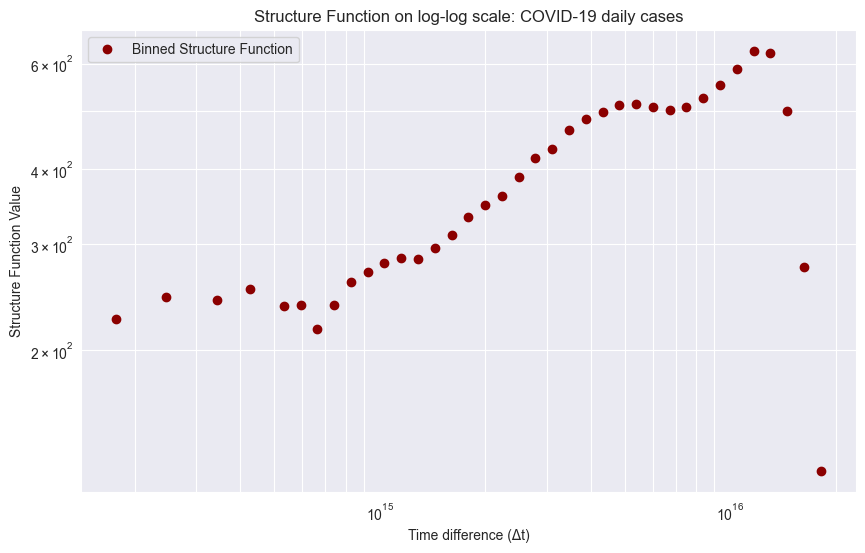

In [23]:
delta_tb, SF_b = structure_function_binned(t_daily_cases, y_daily_cases)
# Plot
plt.figure(figsize=(10, 6))
plt.loglog(delta_tb, SF_b, 'o', label='Binned Structure Function', color="darkred")
plt.xlabel('Time difference (Δt)')
plt.ylabel('Structure Function Value')
plt.title('Structure Function on log-log scale: COVID-19 daily cases')
plt.grid(which='both')
plt.legend()
plt.show()

Apply the function to COVID-19 daily deaths:

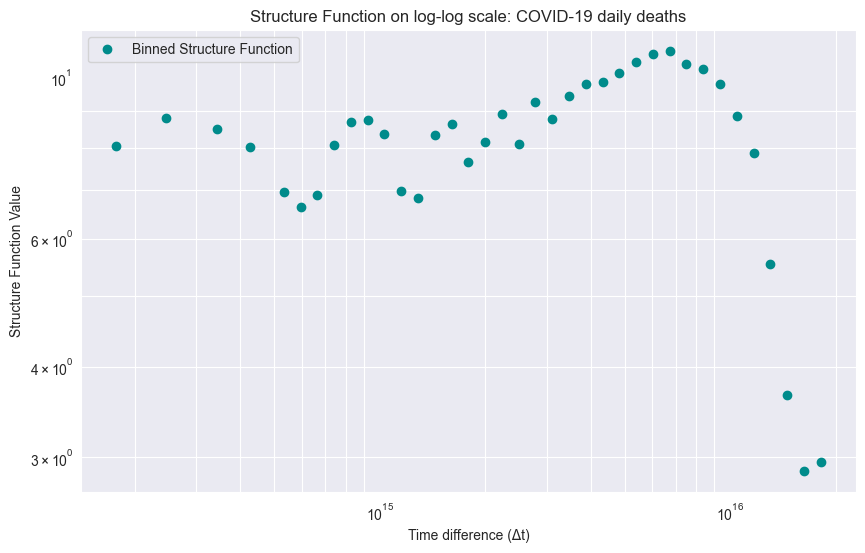

In [24]:
delta_tb, SF_b = structure_function_binned(t_daily_deaths, y_daily_deaths)
plt.figure(figsize=(10, 6))
plt.loglog(delta_tb, SF_b, 'o', label='Binned Structure Function', color="darkcyan")
plt.xlabel('Time difference (Δt)')
plt.ylabel('Structure Function Value')
plt.title('Structure Function on log-log scale: COVID-19 daily deaths')
plt.grid(which='both')
plt.legend()
plt.show()

### Bispectrum Analysis

In [25]:
interpolation_function = interp1d(t_daily_cases, y_daily_cases, kind='cubic')
t_even = np.linspace(t_daily_cases.min(), t_daily_cases.max(), len(t_daily_cases))
y_even = interpolation_function(t_even)

In [26]:
# Define bispectrum function:
def bispectrum(y, freq_bins=30):
    Y = fft(y)
    n = len(Y)
    bisp = np.zeros((freq_bins, freq_bins), dtype=complex)

    for f1 in range(freq_bins):
        for f2 in range(freq_bins):
            bisp[f1, f2] = Y[f1] * Y[f2] * np.conjugate(Y[(f1 + f2) % n])
    return bisp

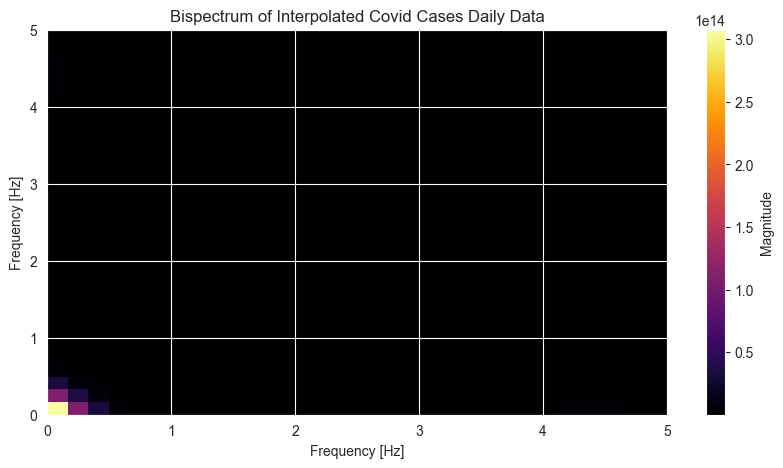

In [27]:
bisp_int = bispectrum(y_even)

plt.figure(figsize=(10, 5))
plt.imshow(np.abs(bisp_int), extent=(0, 5, 0, 5), aspect='auto', origin='lower',cmap="inferno")
plt.colorbar(label='Magnitude')
plt.title('Bispectrum of Interpolated Covid Cases Daily Data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Frequency [Hz]')
plt.grid(True)
plt.show()

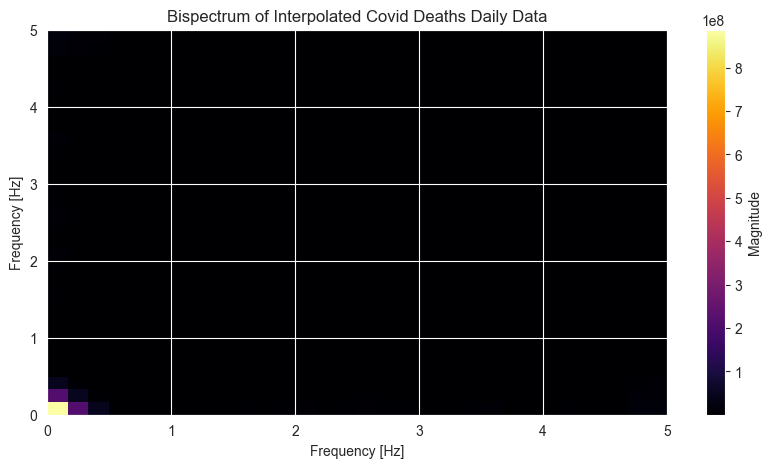

In [28]:
interpolation_function = interp1d(t_daily_deaths, y_daily_deaths, kind='cubic')
t_even = np.linspace(t_daily_deaths.min(), t_daily_deaths.max(), len(t_daily_deaths))
y_even = interpolation_function(t_even)

bisp_int = bispectrum(y_even)

plt.figure(figsize=(10, 5))
plt.imshow(np.abs(bisp_int), extent=(0, 5, 0, 5), aspect='auto', origin='lower', cmap="inferno")
plt.colorbar(label='Magnitude')
plt.title('Bispectrum of Interpolated Covid Deaths Daily Data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Frequency [Hz]')
plt.grid(True)
plt.show()

Minimum magnitude: 8789.695811958705
Maximum magnitude: 887503681.0


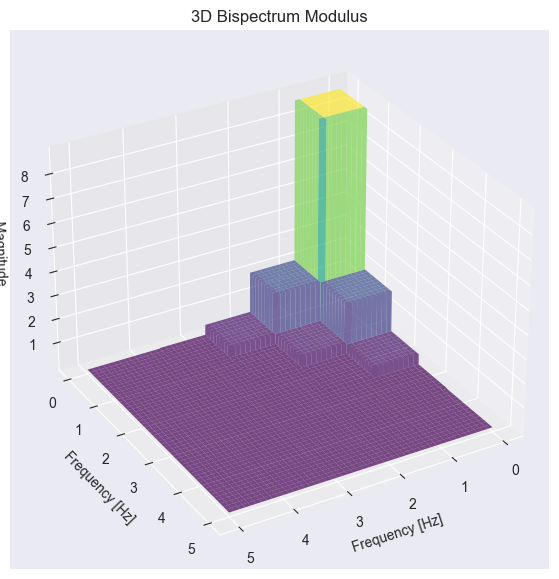

In [29]:
# from mpl_toolkits.mplot3d import Axes3D

# ... [Previous code for light curve generation, interpolation, etc.]

def bispectrum(y, max_freq=0.5, freq_bins=100):
    Y = fft(y)
    n = len(Y)
    bisp = np.zeros((freq_bins, freq_bins), dtype=complex)
    freq_values = np.linspace(0, max_freq, freq_bins)
    bin_width = n * max_freq / freq_bins

    for i, f1 in enumerate(freq_values):
        for j, f2 in enumerate(freq_values):
            index1 = int(f1 * bin_width)
            index2 = int(f2 * bin_width)
            bisp[i, j] = Y[index1] * Y[index2] * np.conjugate(Y[int((index1 + index2) % n)])

    return freq_values, bisp

freq_values, bisp = bispectrum(y_even, max_freq=5, freq_bins=1000)

# Ensure the magnitude values are within expected range
magnitude = np.abs(bisp)
print(f"Minimum magnitude: {magnitude.min()}")
print(f"Maximum magnitude: {magnitude.max()}")

# 3D Plotting of bispectrum modulus
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(freq_values, freq_values)
Z = magnitude

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.7)
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Frequency [Hz]')
ax.set_zlabel('Magnitude')
ax.set_title('3D Bispectrum Modulus')
ax.view_init(30, 60)  # Adjust view angle for

#### 5. Multifractal Detrended Fluctuation Analysis (MFDFA)

C:\Users\marko\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\marko\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Estimated H = 0.390


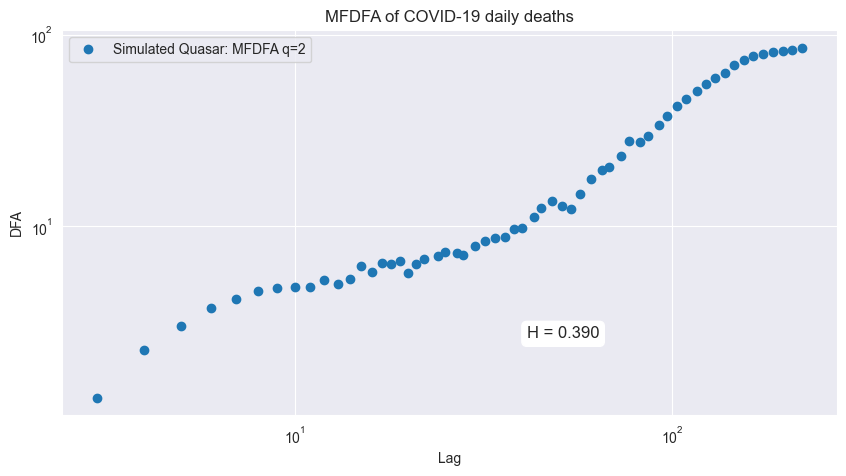

In [40]:
# Data array
y_uneven = y_daily_deaths.to_numpy()

# Select a band of lags
lag = np.unique(np.logspace(0.5, 3, 100).astype(int))

# Power q
q = 2

# Polynomial fitting order
order = 1

# Compute MFDFA
lag, dfa = MFDFA(y_uneven, lag=lag, q=q, order=order)

# Plotting log-log MFDFA results
plt.figure(figsize=(10,5))
plt.loglog(lag, dfa, 'o', label='Simulated Quasar: MFDFA q=2')

# Fitting line to estimate Hurst index
slope, intercept = np.polyfit(np.log(lag)[4:20], np.log(dfa)[4:20], 1)
H_hat = slope[0]
print(f'Estimated H = {H_hat:.3f}')

# Annotating the Hurst index on the plot
plt.annotate(f'H = {H_hat:.3f}', xy=(0.6, 0.2), xycoords='axes fraction', fontsize=12, bbox=dict(boxstyle="round", fc="w"))
plt.title('MFDFA of COVID-19 daily deaths')
plt.xlabel('Lag')
plt.ylabel('DFA')
plt.grid(True)
plt.legend()
plt.show()

Low H value indicates negative correlation or alternating behavior.

In [44]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False

colours = ['#660022','#003300','#cc3300']

1.0 3.25 4.825 6.175 7.525 9.775


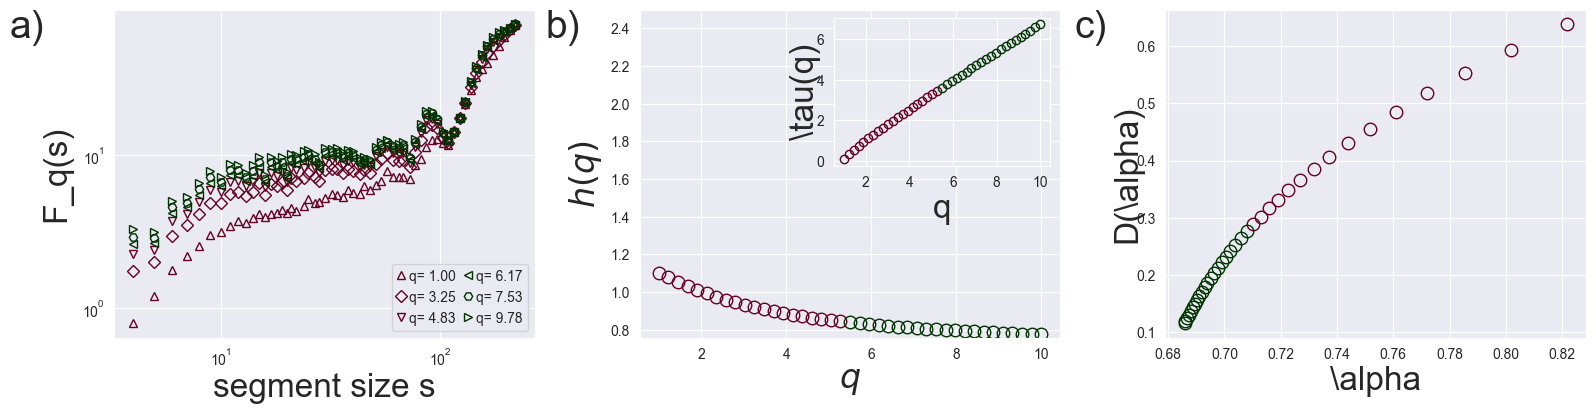

In [45]:
lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
q_list = np.linspace(1,10,41)
q_list = q_list[q_list!=0.0]
lag, dfa_sun =  MFDFA(y_uneven, lag, q=q_list, order=2)
print(q_list[0], q_list[10],q_list[17],q_list[23],q_list[29], q_list[39])
# %% ################################## FIG03 ##################################
fig, ax = plt.subplots(1,3, figsize=(16,4))

ax[0].loglog(lag[:], dfa_sun[:,[0]],  '^', markersize=6, markerfacecolor='none',
             color=colours[0], label=f'q= {q_list[0]:.2f}')
ax[0].loglog(lag[:], dfa_sun[:,[10]], 'D', markersize=6, markerfacecolor='none',
             color=colours[0], label=f'q= {q_list[10]:.2f}')
ax[0].loglog(lag[:], dfa_sun[:,[17]], 'v', markersize=6, markerfacecolor='none',
             color=colours[0], label=f'q= {q_list[17]:.2f}')
ax[0].loglog(lag[:], dfa_sun[:,[23]], '<', markersize=6, markerfacecolor='none',
             color=colours[1], label=f'q= {q_list[23]:.2f}')
ax[0].loglog(lag[:], dfa_sun[:,[29]], 'H', markersize=6, markerfacecolor='none',
             color=colours[1], label=f'q= {q_list[29]:.2f}')
ax[0].loglog(lag[:], dfa_sun[:,[39]], '>', markersize=6, markerfacecolor='none',
             color=colours[1], label=f'q= {q_list[39]:.2f}')

ax[0].set_ylabel(r'F_q(s)',labelpad=7,fontsize=24)
ax[0].set_xlabel(r'segment size s',labelpad=3,fontsize=24)

slopes_s1 = np.polynomial.polynomial.polyfit(np.log(lag)[20:55],np.log(dfa_sun)[20:55],1)[1]

ax[1].plot(q_list[:20], slopes_s1[:20],'o', markersize=9,
           markerfacecolor='none', color=colours[0])
ax[1].plot(q_list[20:], slopes_s1[20:],'o', markersize=9,
           markerfacecolor='none', color=colours[1])

ax[1].set_ylim([None,2.5])
ax[1].set_ylabel(r'$h(q)$',labelpad=5,fontsize=24)
ax[1].set_xlabel(r'$q$',labelpad=3,fontsize=24)

axi2 = fig.add_axes([0.52, 0.6, 0.135, .37])
axi2.plot(q_list[:20], q_list[:20]*slopes_s1[:20]-1,'o', markersize=6,
          color=colours[0], markerfacecolor='none')
axi2.plot(q_list[20:], q_list[20:]*slopes_s1[20:]-1,'o', markersize=6,
          color=colours[1], markerfacecolor='none')

axi2.set_xlabel(r'q',labelpad=3,fontsize=24)
axi2.set_ylabel(r'\tau(q)',labelpad=-3,fontsize=24)


t_sun = q_list * slopes_s1 - 1
hq_sun = np.gradient(t_sun) / np.gradient(q_list)
f_sun = q_list * hq_sun - t_sun

ax[2].plot(hq_sun[5:20], f_sun[5:20],'o', markersize=9,
           markerfacecolor='none', color=colours[0])
ax[2].plot(hq_sun[20:], f_sun[20:],'o', markersize=9,
           markerfacecolor='none', color=colours[1])

ax[2].set_xlabel(r'\alpha',labelpad=3,fontsize=24)
ax[2].set_ylabel(r'D(\alpha)',labelpad=-5,fontsize=24)

ax[0].legend(loc=4, handletextpad=.3, handlelength=.5, ncol=2,
             columnspacing=.65)

locmaj = matplotlib.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
ax[0].yaxis.set_major_locator(locmaj)

locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * .1,
                                      numticks=100)
ax[0].yaxis.set_minor_locator(locmin)
ax[0].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

fig.text(.005, .92, r'a)', fontsize=28)
fig.text(.34, .92, r'b)', fontsize=28)
fig.text(.67, .92, r'c)', fontsize=28)

fig.subplots_adjust(left=.07, bottom=.17, right=.99, top=.99, hspace=.06,
                    wspace=.25)